## Import lib

In [1]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
from feature import *

### Các công thức tính khoảng cách

In [2]:
# Khoảng cách euclidean
def euclidean_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)
# Khoảng cách Cosin
def cosin_distance(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

### Cụm và tìm tâm gần nhất

In [3]:
# Hàm đọc ảnh từ thư mục
def Centers(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        centers = []
        for line in lines:
            center = [float(x) for x in line.strip().split()]
            centers.append(center)
        return centers
# Tìm cụm
def find_Center(point, centers):
    point = np.array(point)
    min_distance = float('inf')
    closest_center = None
    closest_index = -1
    
    for i,center in enumerate(centers):
        
        distance = euclidean_distance(point, center)
        
        if distance < min_distance:
            min_distance = distance
            closest_center = center
            closest_index = i
    
    return closest_center, closest_index

### Hàm thư mục chứa ảnh tương ứng

In [4]:
def find_cluster(point1,point2):
    point=point1
    folder_path = "D:\\Nhat\\term_8\\MDS\\src\\kmeans"
    filename ="cluster_center.txt"
    file_path = os.path.join(folder_path, filename)
    while os.path.exists(file_path):
        centers = Centers(file_path)
        center, index = find_Center(point, centers)

        folder_path = os.path.join(folder_path, str(index))
        file_path = os.path.join(folder_path, filename)
        point =point2
    
    return folder_path 

### Luồng chính

In [5]:
image_path = "D:\\Nhat\\term_8\\MDS\\src\\Test_data\\r_321_100.jpg"
image = cv.imread(image_path)
image_original = image.copy()

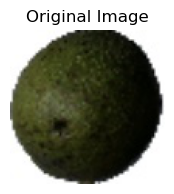

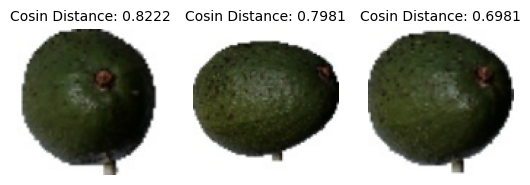

In [6]:
image_HSV = average_HSV(image)
image_HSV_simple = average_HSV_simple(image)
cluster_path = find_cluster(image_HSV,image_HSV_simple)

image_feature = get_image_feature(image,cluster_path)

metadata_path = os.path.join(cluster_path, "metadata.txt")

metadata = {}

with open(metadata_path,"r") as file:
    for line in file:
        key, value = line.strip().split(": ",1)
        key = key.strip()
        value = value.strip()
        
        dict_value = eval(value)
        
        for key1,value1 in dict_value.items():
            if isinstance(value1, list):
                pass
            else:
                try:
                    dict_value[key1] = float(value1)
                except ValueError:
                    pass
                
        metadata[key] = dict_value

for key in metadata:
    dict_tmp = metadata[key]
    feature = dict_tmp['Bow']
    distance = cosin_distance(image_feature, feature)
    metadata[key]=distance

sorted_metadata = sorted(metadata.items(), key=lambda x: x[1],reverse=True)[:3]

image_original = cv.cvtColor(image_original, cv.COLOR_BGR2RGB)
fig = plt.figure(figsize=(15,2))
plt.imshow(image_original)
plt.title("Original Image")
plt.axis('off')
plt.show()
fig, axes = plt.subplots(1,len(sorted_metadata))

for i,(path,data) in enumerate(sorted_metadata):
    image = cv.imread(path)
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    axes[i].imshow(image_rgb)
    axes[i].set_title('Cosin Distance: {:.4f}'.format(data), fontsize=10)
    axes[i].axis('off')
    
plt.show()
